# Курсовая работа
## Data Scientist. Machine Learning <br><br>

#### Описание работы:
Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.<br>

Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.<br>

Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

`telecom_users.csv` содержит следующие значения:<br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

### Импорт модулей и библиотек

In [1]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Загрузка исходных данных

In [2]:
# Загрузка исходных данных
data_df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

In [3]:
# Вывод названий признаков
data_df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
# Приведение названий признаков к единому формату имен
data_df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

In [5]:
# Вывод фрагмента загруженных данных
data_df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


Из выведенного фрагмента данных видно, что признак с уникальными номерами клиентов **(customerID)** не несёт никакой информации. Признак можно удалить.

In [6]:
# Удаление признака "customerID" из датасета
data_df.drop(columns={'customerID'}, inplace=True)

### Информация о структуре исходных данных

In [7]:
# Информация о размерности данных
data_df.shape

(5986, 20)

In [8]:
# Информация о типах данных
data_df.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Информация о пропущенных данных
data_df.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
# Основные статистические показатели для числовых данных
data_df.describe(include=np.number)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# Основные статистические показатели для строковых данных
data_df.describe(include=np.object)

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


### Очистка данных
Учитывая, что количество пропусков в столбце **TotalCharges** меньше 1% от общего числа исходных данных, строки с отсутствующими данными можно удалить.

In [12]:
# Удаление пропусков из исходных данных
data_df.dropna(inplace=True)

### Результаты и выводы
В результате процесса очистки данных и удаления аномалий осталось 5976 данных о клиентах и 19 признаков.

# 2. Исследование зависимостей и формулирование гипотез

### Анализ целевого признака

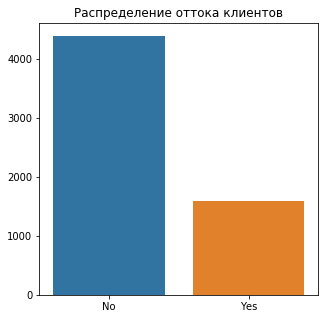

In [13]:
# Определение размеров диаграммы
plt.subplots(figsize=(5, 5))

# Построение распределения целевого признака
ax = sns.countplot(data_df['Churn'])

# Оформление диаграммы
plt.setp(ax, xlabel=None, ylabel=None, title='Распределение оттока клиентов')

# Вывод диаграммы
plt.show()

### Анализ категориальных и бинарных признаков

Для удобства вывода категориальных значений на диаграмме, заменим длинные наименования на короткие.

In [14]:
# Определение списка категориальных признаков, за исключением целевого признака
columns = data_df.columns[data_df.dtypes == object][:-1].to_list()

# Определение словаря новых значений
new_values = {'No phone service': 'NoPS', 'No internet service': 'NoIS', 'Fiber optic': 'FO', 'Month-to-month': 'Month', 'One year': '1Y', 
              'Two year': '2Y', 'Electronic check': 'ECheck', 'Mailed check': 'Mail', 'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card'}

# Замена длинных названий на короткие
for column in columns:
    data_df[column] = data_df[column].apply(lambda x: new_values[x] if x in new_values else x)

Построим связь категориальных и бинарных признаков с оттоком клиентов.

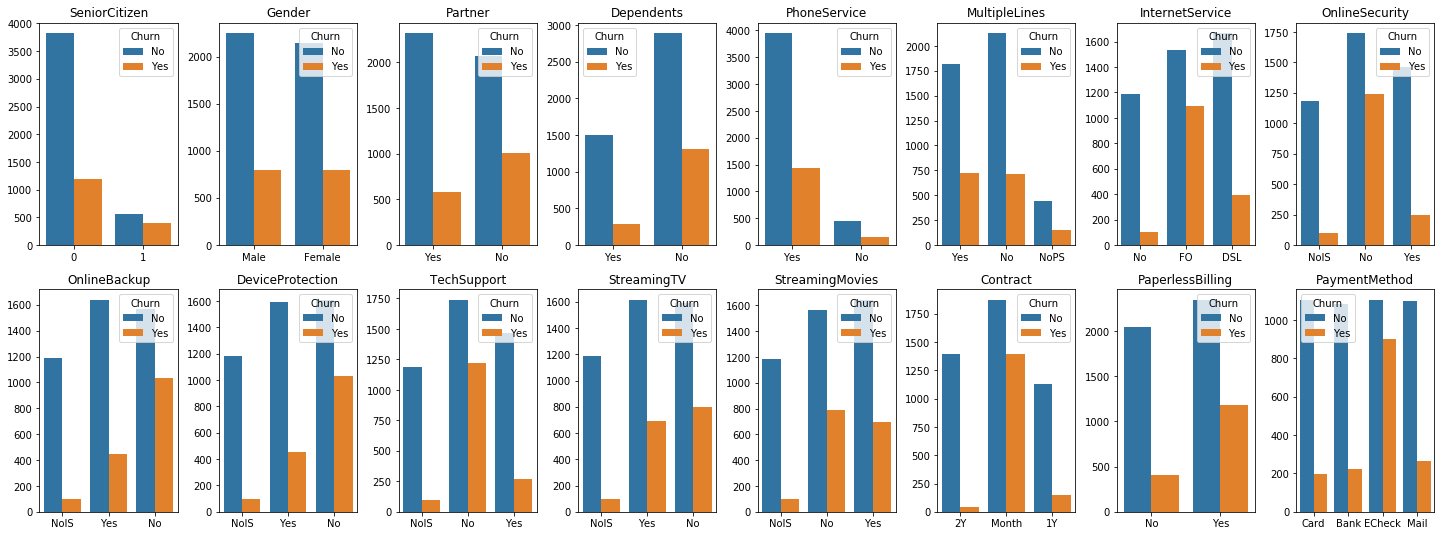

In [15]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(2, 8, figsize=(25, 9), gridspec_kw={'wspace': 0.3})

# Построение связи признаков с оттоком клиентов
for column, ax in zip(['SeniorCitizen'] + columns, axes.flat):
    sns.countplot(column, hue='Churn', data=data_df, ax=ax).set_title(column)
    
# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграммы
plt.show()

Из диаграмм видно, что все признаки, за исключением **Gender**, **PhoneService**, **MultipleLines**, **StreamingTV** и **StreamingMovies** имеют линейную связь с оттоком клиентов. В дальнейшем определим степень линейной связи признаков с целевым показателем и их важность для прогнозирования оттока клиентов.

### Анализ количественных признаков

Построим распределение вероятности для количественных признаков и рассмотрим аномальные значения, которые возможно будут присутствовать в распределении. В случае выбросов, исключим данные значения из рассмотрения. Для усечения данных будем использовать правило 3-х сигм.

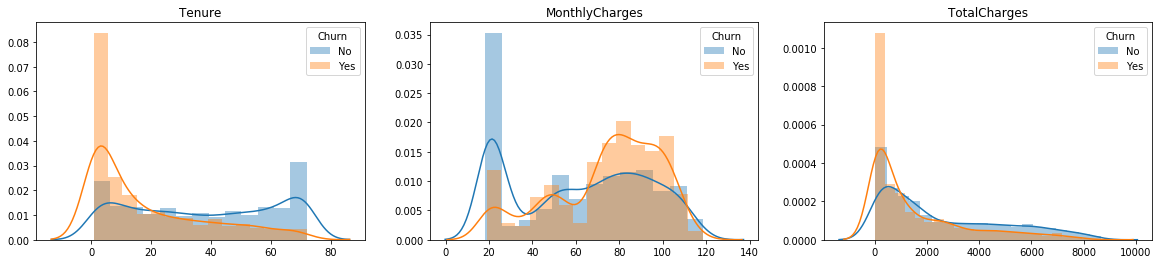

In [16]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['Tenure', 'MonthlyCharges', 'TotalCharges'], axes.flat):
    sns.distplot(data_df.query('Churn=="No"')[column], label='No', ax=ax).set_title(column)
    sns.distplot(data_df.query('Churn=="Yes"')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграмм
plt.show()

Из полученных диаграмм видно, что признаки **Tenure**, **MonthlyCharges**, **TotalCharges** имеют характер распределения близкий к нормальному, а именно:
- признаки **Tenure** и **TotalCharges** представлены усеченной формой распределения, с резким снижением частот;
- признак **MonthlyCharges** представлен бимодальной гистограммой, что возможно свидетельствует о смешении двух различных категорий клиентов.

Кроме того, в признаке **Tenure** прослеживается четкая зависимость между увеличением количества месяцев, на протяжении которых человек является клиентом, и уменьшением оттока клиентов. Также присутствует обратная связь между размером ежемесячного платежа и оттоком.

Дополнительно можно отметить, что аномальные значения вероятностей, которые могли бы искажать распределения, отсутствуют.

### Поиск зависимостей

Используя матрицу рассеивания отразим парное отношение признаков и их распределение.

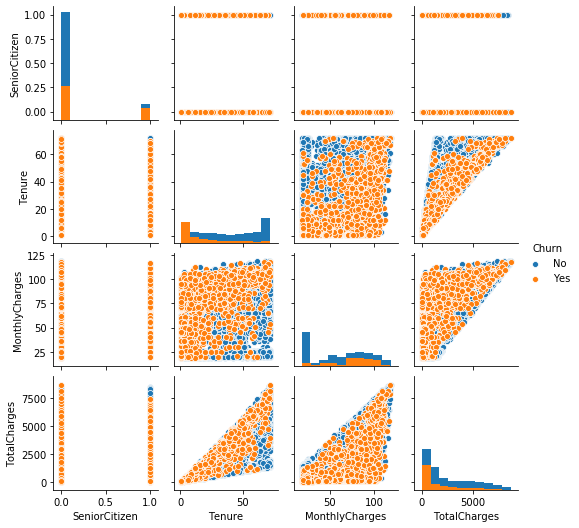

In [17]:
# Вывод пар признаков в матричном виде
sns.pairplot(data_df, hue='Churn', diag_kind='hist', height=1.8)

# Вывод диаграммы
plt.show()

Матрица рассеивания показывает, что имеющиеся численные признаки плохо классифицируются по оттоку клиентов. Тем не менее, признаки **TotalCharges**, **Tenure** и **MonthlyCharges** имеют достаточно высокий характер силы связи.

Также можно обратить внимание, что полученная матрица рассеивания не отражает всех признаков и полной картины линейных взаимосвязей, поэтому имеет смысл ввести дополнительные признаки посредством применения бинарного кодирования (one-hot encoding) к категориальным значениям.

Далее рассмотрим добавление новых признаков и выберем из них самые релевантные.

In [18]:
# Конструирование новых признаков
features_df = pd.get_dummies(data_df, columns=data_df.columns[data_df.dtypes==object], drop_first=True)

# Вывод новых признаков
features_df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_NoPS,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_NoIS,StreamingMovies_Yes,Contract_2Y,Contract_Month,PaperlessBilling_Yes,PaymentMethod_Card,PaymentMethod_ECheck,PaymentMethod_Mail,Churn_Yes
1869,0,72,24.10,1734.65,1,1,1,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4528,0,44,88.15,3973.20,0,0,0,1,0,0,...,1,0,0,0,1,1,1,0,0,0
6344,1,38,74.95,2869.85,0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
6739,0,4,55.90,238.50,1,0,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
432,0,2,53.45,119.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


Выведем матрицу корреляции с линейными коэффициентами Пирсона и проведем оценку степени линейной зависимости между признаками.

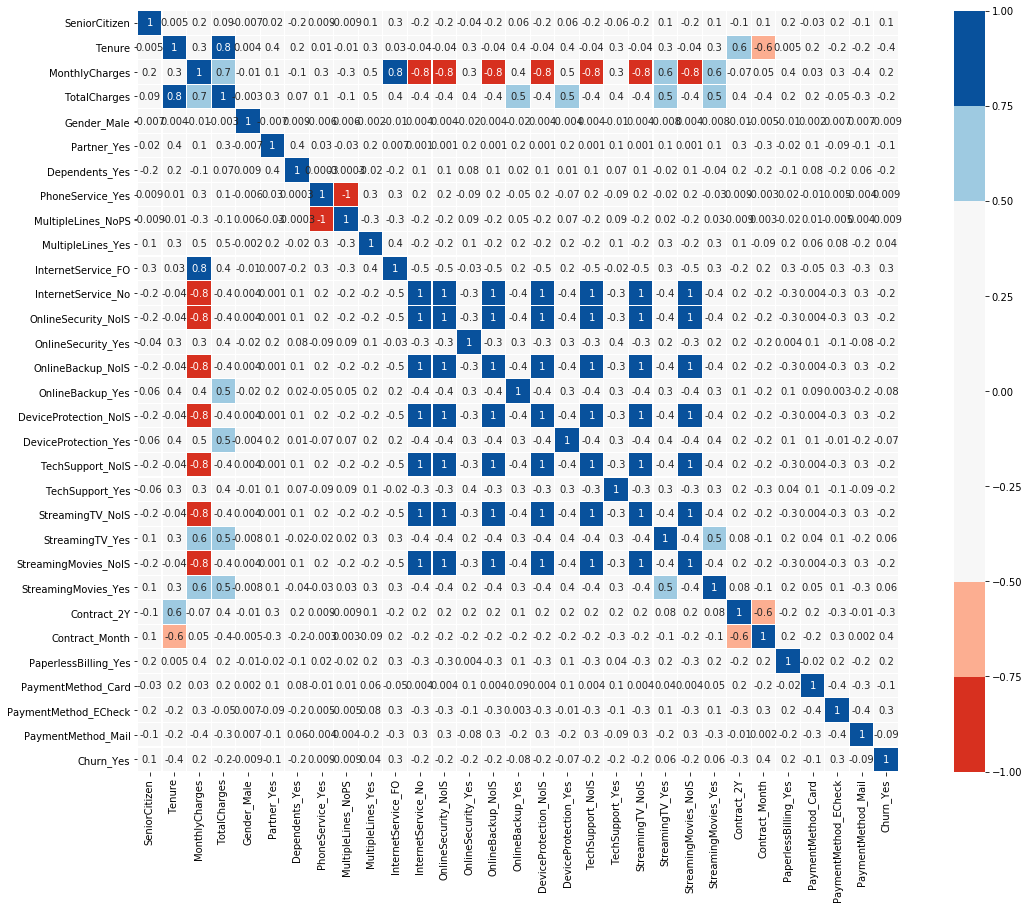

In [19]:
# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    features_df.corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

В соответствии с полученной матрицей корреляции можно сказать, что в результате применения бинарного кодирования к категориальным значениям, полученный набор признаков избыточен. То есть 6-ть идентичных признаков: **OnlineSecurity_NoIS**, **OnlineBackup_NoIS**, **DeviceProtection_NoIS**, **TechSupport_NoIS**, **StreamingTV_NoIS**, **StreamingMovies_NoIS** можно удалить. Они полностью дублируют информацию, отраженную в признаке **InternetService_No**. Также наличие признака **MultipleLines_NoPS** является лишним, поскольку признаки **MultipleLines_NoPS** и **PhoneService_Yes** взаимоисключающие.

На матрице корреляции есть как положительные, так и отрицательные сильные связи между признаками, но с целевым признаком линейные связи очень слабые. Тем не менее, при наличии слабых корреляций между признаками и целевой переменной сохраняется возможность прогноза оттока клиентов.

В заключение можно сказать, что, как и ранее предполагали в анализе категориальных признаков, влияние признаков **Gender**, **PhoneService**, **MultipleLines**, **StreamingTV** и **StreamingMovies** на отток клиентов минимально. В последующем рассмотрим возможность исключения слабых признаков из анализа.

In [20]:
# Удаление признаков идентичных признаку "InternetService_No"
result_df = features_df.drop(columns=['OnlineSecurity_NoIS', 'OnlineBackup_NoIS', 'DeviceProtection_NoIS', 'TechSupport_NoIS', 'StreamingTV_NoIS', 'StreamingMovies_NoIS'])

# Удаление признака идентичного признаку "PhoneService_Yes"
result_df.drop(columns=['MultipleLines_NoPS'], inplace=True)

### Результаты и выводы
В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.

Также сформулируем ряд предположений, которые проверим в ходе работы:
- Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;
- Подтвердим гипотезу об отсутствии влияния признаков **Gender_Male**, **PhoneService_Yes**, **StreamingTV_Yes** и **StreamingMovies_Yes** на отток;
- Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.

# 3. Построение моделей для прогнозирования оттока

### Исходные данные
Разобьем исходные данные на тренировочную и контрольную выборки.

In [21]:
# Определение тренировочной и контрольной выборок
X_train, X_test, y_train, y_test = train_test_split(
    result_df.iloc[:, :-1].values, result_df.iloc[:, -1].values, random_state=17)

### Нормализация данных
Поскольку не все алгоритмы машинного обучения могут хорошо работать с данными из разного диапазона, выполним масштабирование количественных признаков в диапазоне от 0 до 1.

In [22]:
# Нормализация значений признаков
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

### Отбор признаков
Используем отбор признаков чтоб исключить часть переменных, которые возможно будут вносит незначительный вклад в будущую модель. Применим технику RFE (Recursive Feature Elimination) и выберем 10 значимых признаков для прогнозирования оттока клиентов.

In [23]:
# Определение значимых признаков для прогноза целевой переменной
rfe_model = RFE(RandomForestClassifier(max_depth=3), 10).fit(X_train, y_train)

# Вывод признаков
print(result_df.iloc[:, :-1].columns[rfe_model.support_].tolist())

['Tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_FO', 'InternetService_No', 'OnlineSecurity_Yes', 'Contract_2Y', 'Contract_Month', 'PaperlessBilling_Yes', 'PaymentMethod_ECheck']


In [24]:
# Удаление слабых признаков из анализа
X_train = X_train[:, rfe_model.support_]
X_test = X_test[:, rfe_model.support_]

### Модели машинного обучения
Рассмотрим ряд базовых алгоритмов классификации с целью определения лучшего алгоритма для прогноза оттока клиентов. В качестве метрики оценки алгоритма выберем показатель площади под кривой ошибок **(ROC_AUC)**, что позволит в целом оценить качество классификации алгоритма. После определения лучшего алгоритма классификации проведем гиперпараметрическую настройку для оптимизации модели и оценим работу финальной модели на тестовой выборке данных.

In [25]:
# Определение базовых алгоритмов машинного обучения
models = [KNeighborsClassifier(), 
          GaussianNB(), 
          SVC(random_state=17), 
          RandomForestClassifier(n_jobs=-1, random_state=17), 
          XGBClassifier(n_jobs=-1, random_state=17)]

# Список метрик качества алгоритмов
scores = []

# Поиск подходящего базового алгоритма машинного обучения
for n, model in enumerate(models):
    scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1).mean())

# Список наименований базовых алгоритмов
names = ['Метод К-ближайших соседей', 'Байесовский классификатор', 
         'Метод опорных векторов', 'Случайный лес', 'Градиентный бустинг']

# Вывод метрик качества базовых алгоритмов
pd.DataFrame({'AUC': scores}, index=names)

,AUC
Метод К-ближайших соседей,0.798826
Байесовский классификатор,0.831615
Метод опорных векторов,0.779958
Случайный лес,0.808100
Градиентный бустинг,0.817559


Из полученных результатов видно, что лучший результат показал Наивный байесовский классификатор с показателем **AUC=0.83**. Поскольку Байесовский алгоритм не обладает гиперпараметрами для более точной настройки модели машинного обучения, дополнительно рассмотрим Градиентный бустинг с показателем **AUC=0.82**.

Выбрав алгоритм классификации перейдем к его оптимизации под задачу прогнозирования оттока клиентов. Настройку гиперпараметров модели реализуем через сеточный поиск с оценкой по метрике **AUC**.

In [26]:
# Гиперпараметры модели машинного обучения
params = {'n_estimators': [40],
          'max_depth': [2],
          'learning_rate': [0.2]}
# params = {'n_estimators': np.arange(10, 100, 10),
#           'max_depth': np.arange(2, 10, 2),
#           'learning_rate': np.arange(0.1, 0.3, 0.1)}

# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model = GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': xgb_model.best_score_}, index=['Градиентный бустинг'])

,AUC
Градиентный бустинг,0.847894


В соответствии с полученной метрикой качества модели машинного обучения можно сказать, что настроенный Градиентный бустинг **(AUC=0.85)** незначительно, но эффективнее чем Наивный байесовский классификатор **(AUC=0.83)**.

Далее рассчитаем эффективность модели на Стекинге и сравним с метрикой качества Градиентного бустинга.

In [27]:
# Гиперпараметры мета-модели
params = {'n_estimators': [40],
          'learning_rate': [0.3],
          'min_child_weight': [5],
          'subsample': [0.1]}
# params = {'n_estimators': np.arange(10, 100, 10),
#           'learning_rate': np.arange(0.1, 1.0, 0.2),
#           'min_child_weight': np.arange(1, 10, 2),
#           'subsample': np.arange(0.1, 1.0, 0.2)}

# Определение базовых алгоритмов мета-модели
meta_alg = [KNeighborsClassifier(), 
            GaussianNB(), 
            SVC(random_state=17), 
            RandomForestClassifier(n_jobs=-1, random_state=17)]

# Определение алгоритма мета-модели
model = XGBClassifier(n_jobs=-1, random_state=17)

# Получение матрицы мета-признаков на основе тренировочных данных
meta_mtrx = np.empty((X_train.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx[:, n] = cross_val_predict(alg, X_train, y_train, cv=10, n_jobs=-1)

# Получение матрицы мета-признаков на основе тестовых данных
meta_mtrx_test = np.empty((X_test.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx_test[:, n] = alg.fit(X_train, y_train).predict(X_test)

# Поиск оптимальных параметров мета-модели
meta_model = GridSearchCV(model, params, cv=10, scoring='roc_auc', n_jobs=-1).fit(meta_mtrx, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': meta_model.best_score_}, index=['Стекинг'])

,AUC
Стекинг,0.804114


Полученный результат метрики качества Стекинга **(AUC=0.80)** оказался хуже метрики Градиентного бустинга **(AUC=0.85)**. В последующем оценим эффективность всех вышеотмеченных моделей **(Байесовский классификатор, Градиентный бустинг, Стекинг)** по метрике "полнота" **(Recall)**, поскольку нас интересует минимизация ложноотрицательных прогнозов, выдаваемых моделями.

### Результаты и выводы

В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие неплохую метрику качества **ROC_AUC**:
- Байесовский классификатор - **0.83**;
- Градиентный бустинг - **0.85**;
- Стекинг - **0.80**.

Учитывая, что основной задачей является прогноз ухода клиентов, в последующем выполним расчет и сравнение оценок моделей по метрике "полнота" **(Recall)**. Данная метрика позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти.

Поскольку в области принятия решений предпочтительнее опираться на вероятность, также определим значения вероятностей оттока клиентов. Предсказание вероятности ухода позволит понять к какому из клиентов следует обратиться в первую очередь, а к кому в последнюю.

# 4. Сравнение качества моделей 

### Метрики качества моделей

In [28]:
# Определение модели машинного обучения
gnb_model = GaussianNB().fit(X_train, y_train)

# Расчет прогноза моделей
gnb_predict = gnb_model.predict(X_test)
xgb_predict = xgb_model.best_estimator_.predict(X_test)
meta_predict = meta_model.best_estimator_.predict(meta_mtrx_test)

# Вывод метрик качества моделей
pd.DataFrame({'AUC': [roc_auc_score(y_test, gnb_predict), roc_auc_score(y_test, xgb_predict), roc_auc_score(y_test, meta_predict)], 
              'Recall': [recall_score(y_test, gnb_predict), recall_score(y_test, xgb_predict), recall_score(y_test, meta_predict)],
              'Precision': [precision_score(y_test, gnb_predict), precision_score(y_test, xgb_predict), precision_score(y_test, meta_predict)]}, 
             index=['Байесовский классификатор', 'Градиентный бустинг', 'Стекинг'])

,AUC,Recall,Precision
Байесовский классификатор,0.730794,0.783375,0.468373
Градиентный бустинг,0.708877,0.528967,0.632530
Стекинг,0.722432,0.574307,0.616216


### Матрицы ошибок

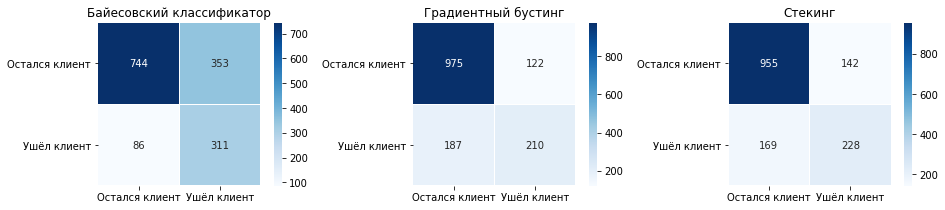

In [29]:
# Определение размера диаграмм
fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# Список целевых переменных предсказанных моделями
y_predicts = [gnb_predict, xgb_predict, meta_predict]

# Список наименований моделей
name_models = ['Байесовский классификатор', 'Градиентный бустинг', 'Стекинг']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='Blues', square=True, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

Из результатов сравнения моделей видно, что Наивный байесовский классификатор превосходит остальные алгоритмы по показателю полноты **(Recall)**. При 397 фактических случаев ухода клиентов, 311 оказались правильными. По показателю точности **(Precision)** на первом месте Градиентный бустинг. При 332 спрогнозированных случаях оттока, 210 правильные.

Хотя по показателю полноты Наивный байесовский классификатор превосходит Градиентный бустинг и Стекинг, по точности им уступает. Если не затрагивать вопрос интерпретируемости полученных результатов, выбор очевиден - Байесовский классификатор, поскольку производит лучший охват в прогнозе оттока клиентов.

Далее рассмотрим, как интерпретируются полученные результаты выбранных моделей: **Наивного байесовского классификатора**, **Градиентного бустинга** и **Стекинга**. Также определим лучшую модель для выявления клиентов, которые не собираются продлевать контракт.

### Вероятность оттока

Определим функцию сравнения прогнозных вероятностей оттока клиентов, полученных с помощью модели машинного обучения, с фактическими исходами.

In [30]:
def predict_probabilities(model, X, y):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(X)
    
    # Выборка вероятностей для ушедших клиентов с
    # округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:, 1], 1)
    
    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)
    
    # Выборка истинных исходов ушедших клиентов
    true_churn = y==1
    
    # Определение доли истинных исходов ушедших клиентов
    # или реальная вероятность ухода клиента
    true_proba = [np.mean(true_churn[predict_churn==value]) for value in value_churn.index]
        
    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)
    
    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Кол. ушедших', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)
    
    # Возвращение датафрейма
    return result_df

#### Байесовский классификатор

In [31]:
# Вывод вероятностей ухода клиентов
predict_probabilities(gnb_model, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,1.0,400,0.585000
1,0.9,129,0.364341
2,0.8,66,0.257576
3,0.7,40,0.250000
4,0.6,15,0.200000
5,0.5,30,0.066667
6,0.4,22,0.181818
7,0.3,25,0.120000
8,0.2,32,0.187500
9,0.1,39,0.282051


#### Градиентный бустинг

In [32]:
# Вывод вероятностей ухода клиентов
predict_probabilities(xgb_model, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,2,1.000000
1,0.8,62,0.822581
2,0.7,64,0.734375
3,0.6,112,0.607143
4,0.5,139,0.417266
5,0.4,116,0.439655
6,0.3,164,0.262195
7,0.2,181,0.198895
8,0.1,278,0.115108
9,0.0,376,0.023936


#### Стекинг

In [33]:
# Вывод вероятностей ухода клиентов
predict_probabilities(meta_model, meta_mtrx_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.8,33,0.696970
1,0.7,202,0.693069
2,0.5,157,0.452229
3,0.4,31,0.387097
4,0.3,253,0.264822
5,0.2,22,0.500000
6,0.1,796,0.091709


Из полученных результатов прогноза оттока клиентов можно сказать, что Градиентный бустинг показывает более близкую вероятность ухода клиента к фактическому исходу, чем Наивный байесовский классификатор и Стекинг. Для 62 клиентов Градиентный бустинг предсказал вероятность ухода равную 0.80 и в реальности эта группа имеет примерно равный показатель - 0.82. Байесовский классификатор предсказал, что 400 клиентов имеют вероятность ухода, равную 1.00, в реальности эта группа имеет показатель 0.59.

Поскольку вероятность оттока клиентов позволяет оценить не только степень уверенности потери клиента, но и понять с какой группой клиентов следует работать в первую очередь, допускаю, что из трех выбранных моделей для Компании выгоднее смотрится Градиентный бустинг.

### Результаты и выводы

Подводя итоги по проекту можно сделать следующие выводы:
- Раннее выдвинутое предположение о высокой степени связи признаков **Tenure**, **MonthlyCharges**, **TotalCharges** с целевой переменной подтвердилось. Так как данные признаки были определены как значимые и вошли в модель прогноза оттока (разделы "Поиск зависимостей" и "Отбор признаков");
- Также подтвердилась гипотеза об отсутствии влияния признаков **Gender_Male**, **PhoneService_Yes**, **StreamingTV_Yes**, **StreamingMovies_Yes** на отток клиентов;
- Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). **Наивный байесовский классификатор** превзошел остальные модели с показателем 0.78. По показателю полноты данную модель будем считать лучшей;
- Нас интересует как полнота прогнозирования, так и интерпретируемость модели. Разделяя клиентов по степени уверенности потери, на основе показателя точности (Precision), можем выявить первоочередные группы (группы высокого риска). Точное и своевременное нахождение таких групп позволит эффективно бороться с оттоком. Учитывая немаловажность показателя точности в области принятия решений, допускаю, что модель с лучшим определением групп высокого риска предпочтительнее для Компании, чем модель с большим охватом оттока. Поэтому модель **Градиентного бустинга** для бизнеса подходит больше, чем модель Байесовского классификатора;
- В проекте не были затронуты темы профилирования и сегментации клиентов, что не позволит Компании адресно и точно взаимодействовать с клиентами, особенно с клиентами склонных к оттоку и в целом снизит эффективность управления оттоком;
- Также можно отметить, что количество предоставленных данных (клиентов) недостаточно для построения точной модели и важно продолжать расширять клиентскую базу.